In [35]:
#dulieuxettuyendaihoc.csv
import pandas as pd
df = pd.read_csv('dulieuxettuyendaihoc.csv',header=0,delimiter=',',encoding='utf-8')
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [36]:
len(df['KT'].unique())

5

In [37]:
df.isnull().sum()

MSSV                    0
T1                      0
T2                      0
T3                      0
T4                      0
T5                      0
T6                      0
GT                      0
DT                     97
KV                      0
NGONNGU                 0
TOANLOGICPHANTICH       0
GIAIQUYETVANDE          0
KT                      0
NGAYTHI                 0
DINHHUONGNGHENGHIEP     0
dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.stats import kurtosis, skew

In [39]:
df.rename(columns={
    'TOANLOGICPHANTICH': 'LOGIC',
    'GIAIQUYETVANDE': 'VANDE'
}, inplace=True)

In [40]:
df_encoded = pd.get_dummies(df, columns=['KT'], drop_first=True, dtype='int')
df_encoded

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,LOGIC,VANDE,NGAYTHI,DINHHUONGNGHENGHIEP,KT_A1,KT_B,KT_C,KT_D1
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,12/7/2018,No,1,0,0,0
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,12/7/2018,Yes,0,0,1,0
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,12/7/2018,No,0,0,1,0
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,12/7/2018,No,0,0,0,1
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,12/7/2018,No,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,7/20/2022,Yes,0,0,1,0
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,7/20/2022,No,0,0,1,0
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,7/20/2022,Yes,0,0,1,0
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,7/20/2022,No,0,0,1,0


In [41]:
def mapping_KT(kt):
    mapping_dict = {'A1': 1, 'A': 2, 'B': 3, 'C': 4, 'D1': 5}
    return mapping_dict.get(kt, None)  

df['KT_mapped'] = df['KT'].apply(mapping_KT)
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,LOGIC,VANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP,KT_mapped
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No,1
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes,4
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No,4
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No,5
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes,4
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No,4
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,4
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No,4


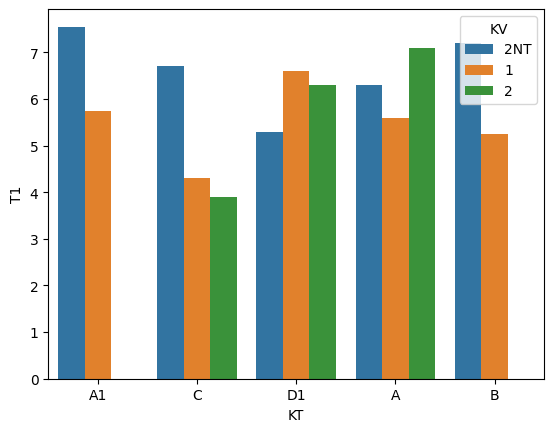

In [42]:
#Câu 1
sns.barplot(x='KT', y='T1', hue='KV', data=df, errorbar=None, estimator=np.median)
plt.show()

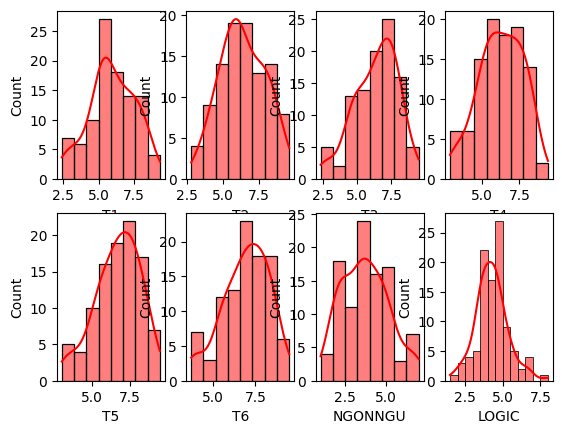

In [43]:
fig, axes=plt.subplots(2,4)
sns.histplot(data=df,x='T1',color='red',label='Forecast',kde=True,ax=axes[0][0])
sns.histplot(data=df,x='T2',color='red',label='Forecast',kde=True,ax=axes[0][1])
sns.histplot(data=df,x='T3',color='red',label='Forecast',kde=True,ax=axes[0][2])
sns.histplot(data=df,x='T4',color='red',label='Forecast',kde=True,ax=axes[0][3])
sns.histplot(data=df,x='T5',color='red',label='Forecast',kde=True,ax=axes[1][0])
sns.histplot(data=df,x='T6',color='red',label='Forecast',kde=True,ax=axes[1][1])
sns.histplot(data=df,x='NGONNGU',color='red',label='Forecast',kde=True,ax=axes[1][2])
sns.histplot(data=df,x='LOGIC',color='red',label='Forecast',kde=True,ax=axes[1][3])
plt.show()

In [44]:
# df['T5'] = df['T5'] ** 2
# df['T5']

In [45]:
from scipy.stats import skew
skew(df['VANDE'] ** 3)

1.8892328373518628

In [46]:
#Câu 3
df[['T1','T2','T3','T4','T5','T6']].corr(method='pearson')

,T1,T2,T3,T4,T5,T6
T1,1.000000,0.745750,0.585319,0.520067,0.592798,0.519035
T2,0.745750,1.000000,0.641550,0.649281,0.570521,0.566116
T3,0.585319,0.641550,1.000000,0.716712,0.657270,0.585507
T4,0.520067,0.649281,0.716712,1.000000,0.663908,0.595900
T5,0.592798,0.570521,0.657270,0.663908,1.000000,0.778683
T6,0.519035,0.566116,0.585507,0.595900,0.778683,1.000000


In [47]:
from scipy.stats import skew
skew(df['NGONNGU'])

0.32820155641315485

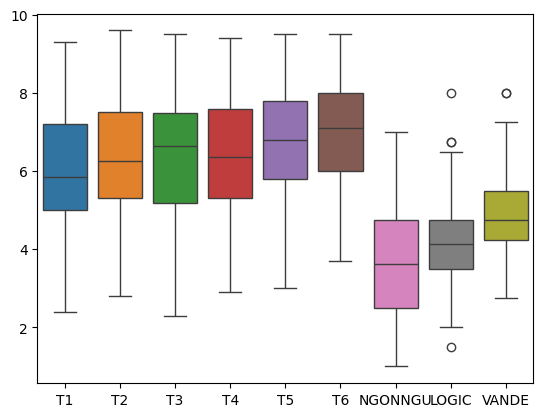

In [48]:
#Câu 4
sns.boxplot(data=df[['T1', 'T2', 'T3','T4','T5','T6','NGONNGU','LOGIC','VANDE']])
plt.show()

In [49]:
#Sinh viên tự khám phá sự ảnh hưởng của T6 đến điểm thi LOGIC
#Hỏi nếu T6 = 6.0 thì dự báo đi thi LOGIC được bao nhiêu
#Câu 5, 6
import statsmodels.api as sm
X_with_constant = sm.add_constant(df[["T3","T4","T5"]].astype(float).values)
y = df[['T6']].astype(float).values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     52.26
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           4.11e-20
Time:                        18:51:18   Log-Likelihood:                -123.97
No. Observations:                 100   AIC:                             255.9
Df Residuals:                      96   BIC:                             266.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8227      0.428      4.257      0.0

In [50]:
df_encoded.columns

Index(['MSSV', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT', 'DT', 'KV', 'NGONNGU',
       'LOGIC', 'VANDE', 'NGAYTHI', 'DINHHUONGNGHENGHIEP', 'KT_A1', 'KT_B',
       'KT_C', 'KT_D1'],
      dtype='object')

In [51]:
X = df_encoded[['T3', 'T4','T5','T6','KT_A', 'KT_A1',
       'KT_B', 'KT_C', 'KT_D1']].astype(float).values
#X = df[['T3', 'T4','T5','T6','KT_mapped']].astype(float).values

KeyError: "['KT_A'] not in index"

In [ ]:
y = df['LOGIC'].astype(float).values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
steps=[('minmaxscaler',MinMaxScaler()),('standardscaler',StandardScaler()),('model',LinearRegression())]
pipe = Pipeline(steps)
model = pipe.fit(X_train,y_train)
model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('standardscaler', StandardScaler()),
                ('model', LinearRegression())])

In [ ]:
#Câu 9
X_test.shape

(20, 5)

In [ ]:
X_train.shape

(80, 5)

In [ ]:
df.shape

(100, 17)

In [ ]:
y_test_pred=pipe.predict(X_test)
y_train_pred=pipe.predict(X_train)

In [52]:
#Câu 7
# 'T3', 'T4','T5','T6','KT_A', 'KT_A1', 'KT_B', 'KT_C', 'KT_D1'
dfTrainValidation=pd.DataFrame(list(zip(
                                      
                                        y_train.flatten(),
                                       y_train_pred.flatten())),
                              columns=['y_train','y_train_predicted'])
dfTrainValidation['Residual']=dfTrainValidation['y_train']-dfTrainValidation['y_train_predicted']
#zip tạo data frame dựa trên mảng
dfTrainValidation.iloc[2]

y_train              5.250000
y_train_predicted    4.413986
Residual             0.836014
Name: 2, dtype: float64

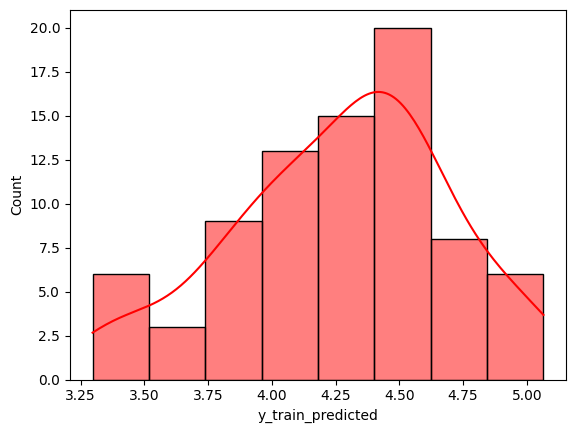

In [ ]:
#tập train
sns.histplot(data=dfTrainValidation,x='y_train_predicted',color='red',label='Forecast',kde=True)
plt.show()

In [ ]:
y_test

array([4.  , 4.5 , 3.5 , 5.25, 4.5 , 4.25, 3.5 , 4.5 , 3.  , 6.  , 6.75,
       4.  , 3.5 , 5.5 , 1.5 , 3.5 , 5.25, 4.5 , 4.  , 2.25])

In [ ]:
y_test_pred

array([4.97473544, 4.68086345, 3.87886084, 3.28565711, 4.0075971 ,
       4.49430358, 4.28817913, 4.7516665 , 3.94491768, 4.55852296,
       3.86150133, 3.25690862, 4.48648998, 4.16905599, 4.11740225,
       4.87632598, 4.50815421, 4.22581285, 3.70696097, 3.94022825])

In [ ]:
#Câu 8
# T3 = 5.00
# T4 = 5.25
# T5 = 6.00
# T6 = 7.25
# KT_A = 1.00
# KT_A1 = 0.00
# KT_B = 0.00
# KT_C = 0.00
# KT_D1 = 0.00

# predicted_Logic = pipe.predict([[T3, T4,T5,T6,KT_A, KT_A1,
#        KT_B, KT_C, KT_D1]])
# print('Giá trị dự báo: ',predicted_Logic)
T3 = 5.00
T4 = 5.25
T5 = 6.00
T6 = 7.25
KT_mapped = 2
predicted_Logic = pipe.predict([[T3, T4,T5,T6,KT_mapped]])
print('Giá trị dự báo: ',predicted_Logic)

Giá trị dự báo:  [4.45265096]


In [ ]:
# Câu 10
correlation_matrix = pd.DataFrame(X_train).corr(method='pearson')
correlation_matrix

,0,1,2,3,4
0,1.000000,0.759114,0.635949,0.603296,-0.043386
1,0.759114,1.000000,0.639750,0.571116,-0.180453
2,0.635949,0.639750,1.000000,0.739391,-0.244323
3,0.603296,0.571116,0.739391,1.000000,-0.286891
4,-0.043386,-0.180453,-0.244323,-0.286891,1.000000


In [ ]:
correlation_values = correlation_matrix.values.flatten()
correlation_values = correlation_values[correlation_values != 1]
closest_to_zero = min(correlation_values, key=abs)
indices = np.where((correlation_matrix.values == closest_to_zero))
row_index = indices[0][0]
col_index = indices[1][0]
result = (correlation_matrix.index[row_index], correlation_matrix.columns[col_index], closest_to_zero)
print(result)

(0, 4, -0.04338599584635916)


In [ ]:
y_test

array([4.  , 4.5 , 3.5 , 5.25, 4.5 , 4.25, 3.5 , 4.5 , 3.  , 6.  , 6.75,
       4.  , 3.5 , 5.5 , 1.5 , 3.5 , 5.25, 4.5 , 4.  , 2.25])

In [ ]:
from scipy.stats import kurtosis
kurtosis(pd.DataFrame(y_test,columns=['y_test']))

array([0.14256624])

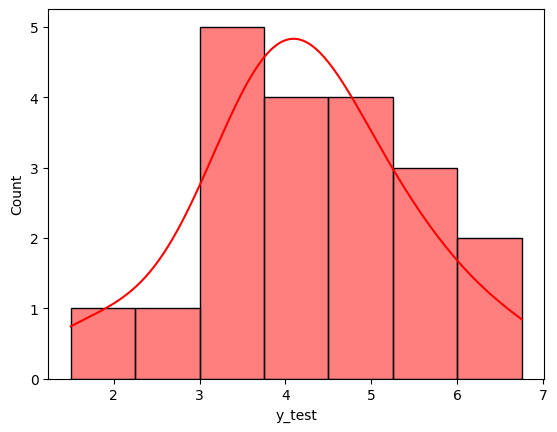

In [ ]:
sns.histplot(data=pd.DataFrame(y_test,columns=['y_test']),x='y_test',color='red',label='Forecast',kde=True)
plt.show()